In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("Data_Train.xlsx")
df_original = df.copy()

In [8]:
df.duplicated().sum()

220

In [9]:
df = df.drop_duplicates()


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
# can get from Date_of_Journey and Duration

# can use Total_Stops instead
df.drop(columns=['Route'], inplace=True)

#df.drop(columns=['Additional_Info'], inplace=True)


In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()


In [16]:
df.duplicated().sum()

0

In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [22]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [23]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [24]:
def parse_arrival_time(row):
    try:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M %d %b')
    except ValueError:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M')

In [25]:
df['Arrival_Time'] = df.apply(parse_arrival_time, axis=1)

In [26]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute


In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,1900-03-22 01:10:00,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1900-06-10 04:25:00,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,21,35


In [28]:
df.drop(columns=['Arrival_Time'], inplace=True)  # Drop the original column

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,21,35


In [30]:
def convert_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'm' in duration.split('h')[-1] else 0
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(convert_duration)


In [31]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648,14,10


In [32]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [33]:
stop_mapping = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)


In [34]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,0.0,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2.0,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2.0,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1.0,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1.0,No info,13302,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,0.0,No info,4107,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,0.0,No info,4145,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,0.0,No info,7229,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,0.0,No info,12648,14,10


In [36]:
df['Dep_Time'] = df['Dep_Time'].str.strip()

In [37]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

In [38]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,1900-01-01 19:55:00,150,0.0,No info,4107,22,25,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,1900-01-01 20:45:00,155,0.0,No info,4145,23,20,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,1900-01-01 08:20:00,180,0.0,No info,7229,11,20,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,1900-01-01 11:30:00,160,0.0,No info,12648,14,10,11,30


In [39]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,21,35,16,50


In [40]:
df.drop(columns=["Dep_Time"], axis = 1, inplace = True)

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50


In [42]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [43]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,150,0.0,No info,4107,22,25,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,155,0.0,No info,4145,23,20,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,180,0.0,No info,7229,11,20,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,160,0.0,No info,12648,14,10,11,30


In [44]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop(columns=['Date_of_Journey'], inplace=True) 


In [45]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,22,25,19,55,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,23,20,20,45,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,11,20,8,20,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,14,10,11,30,1,3


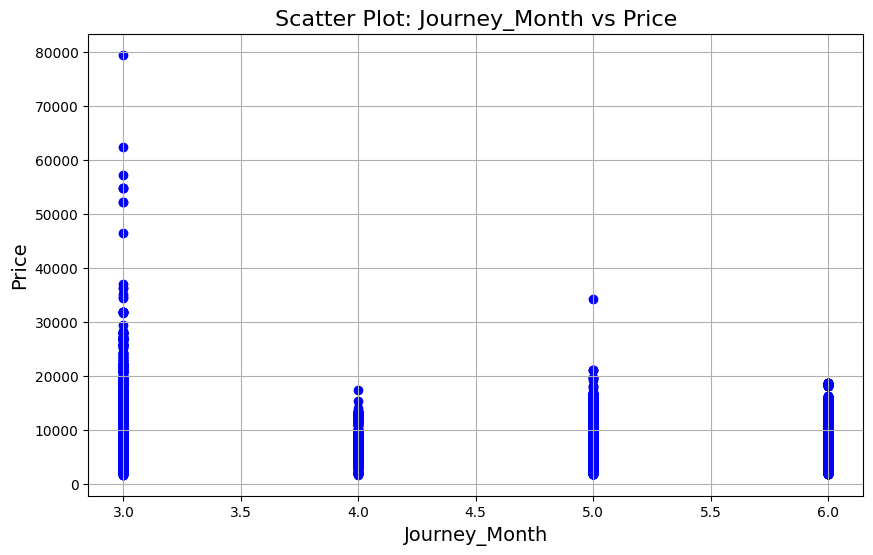

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Journey_Month'], df['Price'], alpha=1, color='blue')
plt.title("Scatter Plot: Journey_Month vs Price", fontsize=16)
plt.xlabel("Journey_Month", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, alpha=1)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

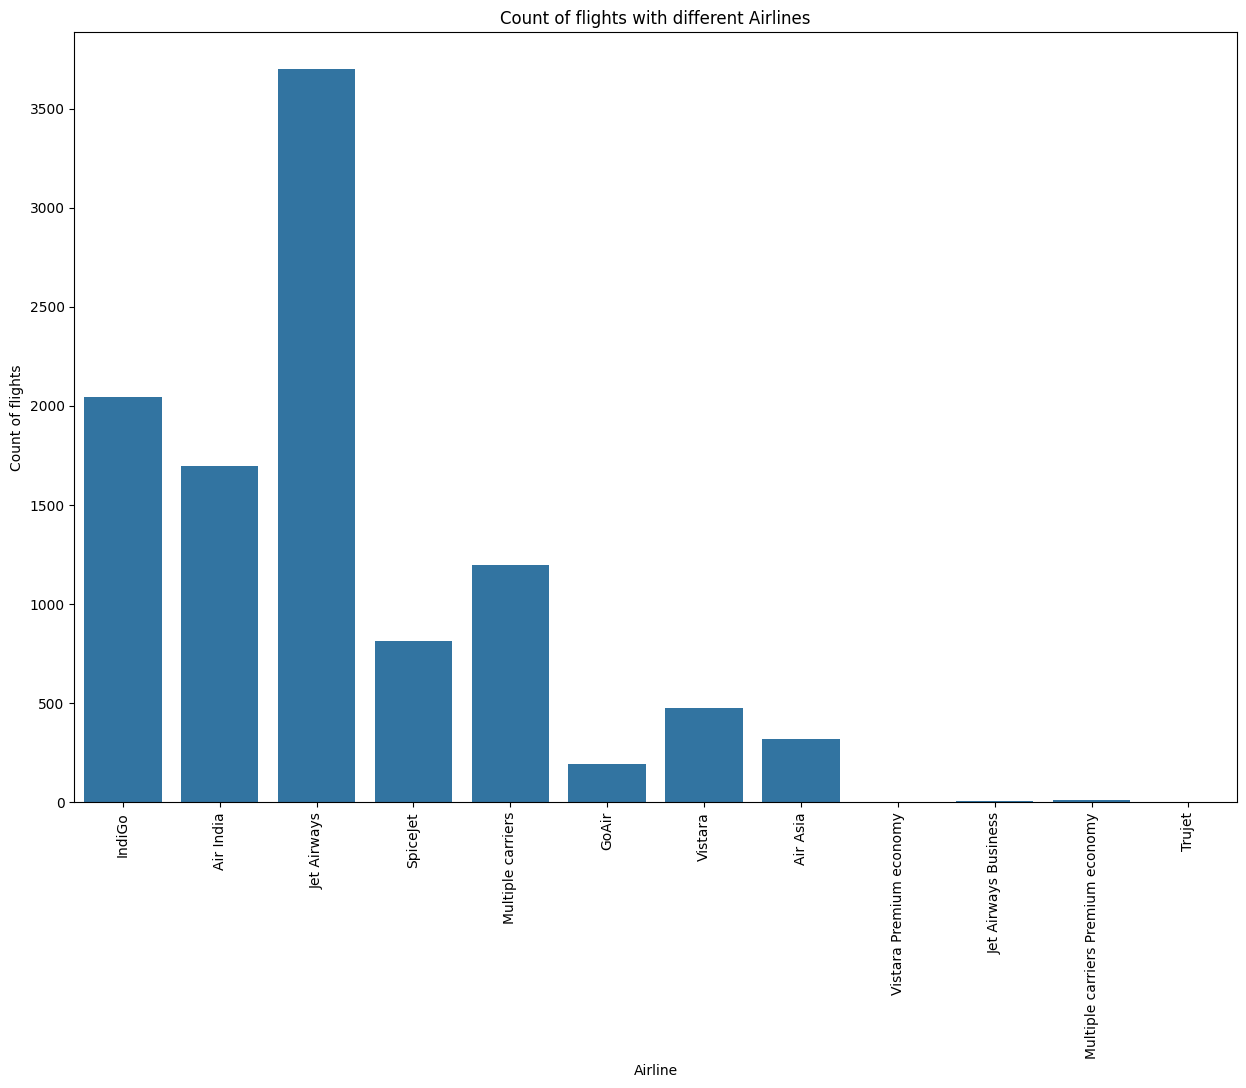

In [60]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

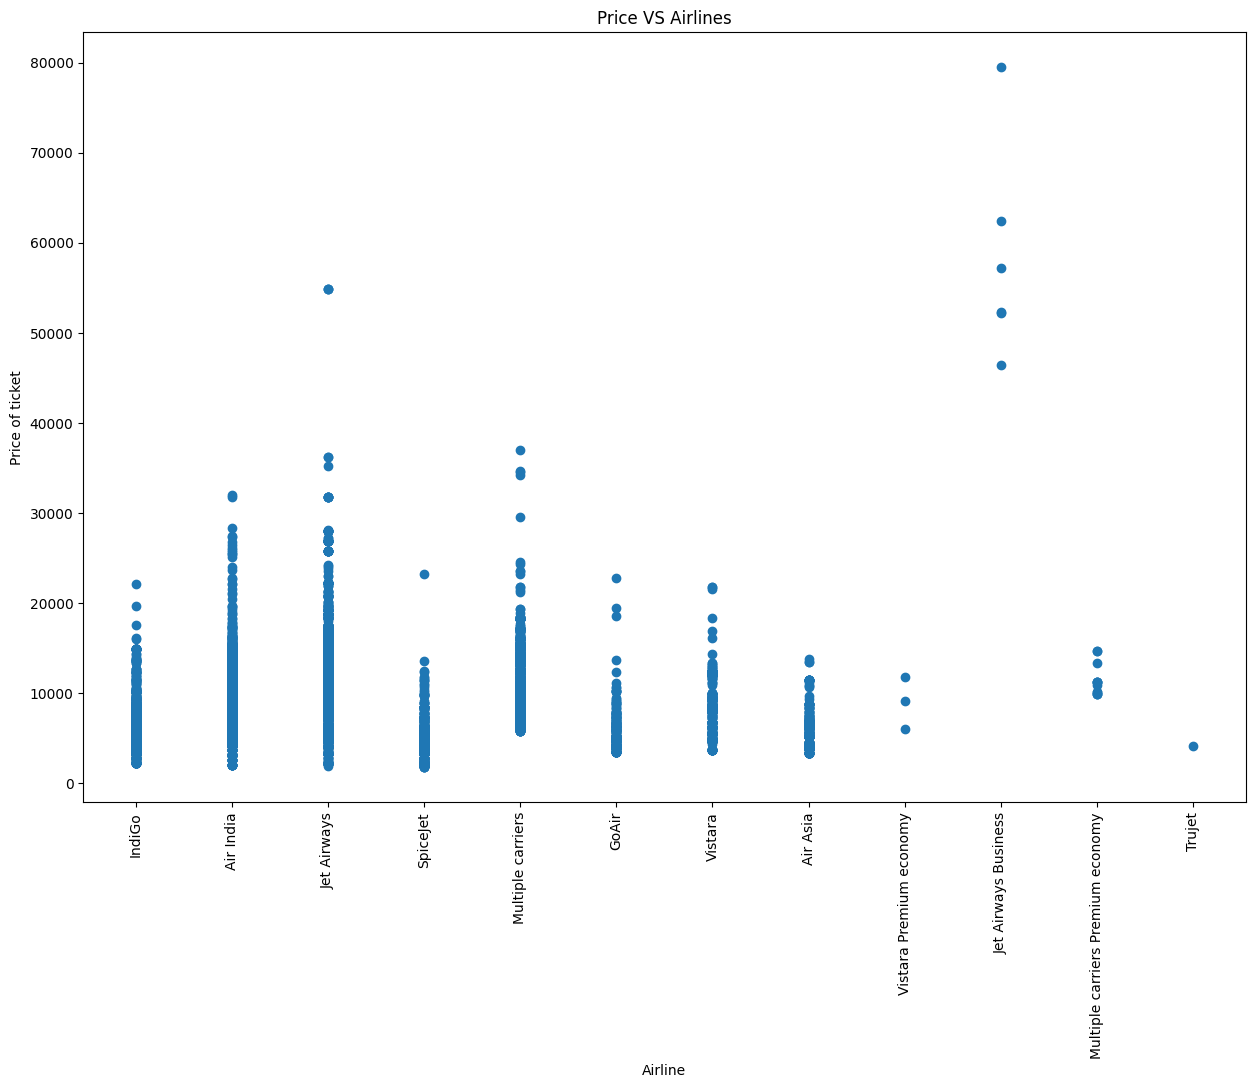

In [61]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [62]:
px.histogram(data_frame=df , x = "Source")

In [63]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [64]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3


In [65]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [66]:
px.histogram(data_frame=df , x = "Destination")

In [50]:
df.duplicated().sum()

2

In [51]:
df = df.drop_duplicates()


In [52]:
df.duplicated().sum()

0

In [53]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10461 non-null  object 
 1   Source           10461 non-null  object 
 2   Destination      10461 non-null  object 
 3   Duration         10461 non-null  int64  
 4   Total_Stops      10460 non-null  float64
 5   Additional_Info  10461 non-null  object 
 6   Price            10461 non-null  int64  
 7   Arrival_Hour     10461 non-null  int32  
 8   Arrival_Minute   10461 non-null  int32  
 9   Dep_Hour         10461 non-null  int32  
 10  Dep_Minute       10461 non-null  int32  
 11  Journey_Day      10461 non-null  int32  
 12  Journey_Month    10461 non-null  int32  
dtypes: float64(1), int32(6), int64(2), object(4)
memory usage: 899.0+ KB


In [54]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
dtype: int64


In [55]:
df = df.dropna(subset=['Total_Stops'])

In [56]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
dtype: int64


In [57]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,22,25,19,55,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,23,20,20,45,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,11,20,8,20,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,14,10,11,30,1,3


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder  ,MinMaxScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression, Ridge, Lasso,SGDRegressor ,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [67]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10460 non-null  object 
 1   Source           10460 non-null  object 
 2   Destination      10460 non-null  object 
 3   Duration         10460 non-null  int64  
 4   Total_Stops      10460 non-null  float64
 5   Additional_Info  10460 non-null  object 
 6   Arrival_Hour     10460 non-null  int32  
 7   Arrival_Minute   10460 non-null  int32  
 8   Dep_Hour         10460 non-null  int32  
 9   Dep_Minute       10460 non-null  int32  
 10  Journey_Day      10460 non-null  int32  
 11  Journey_Month    10460 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 817.2+ KB


In [69]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Arrival_Hour', 'Arrival_Minute',
       'Dep_Hour', 'Dep_Minute', 'Journey_Day', 'Journey_Month'],
      dtype='object')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=102)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7845, 12)
y_train.shape 	 (7845,)
************************************************************
X_test.shape 	 (2615, 12)
y_test.shape 	 (2615,)


In [71]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [72]:
Num_Columns.head()

,Duration,Total_Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,170,0.0,1,10,22,20,24,3
1,445,2.0,13,15,5,50,1,5
2,1140,2.0,4,25,9,25,9,6
3,325,1.0,23,30,18,5,12,5
4,285,1.0,21,35,16,50,1,3


In [73]:
Cat_Columns.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [74]:
Num_Columns.isnull().sum()

Duration          0
Total_Stops       0
Arrival_Hour      0
Arrival_Minute    0
Dep_Hour          0
Dep_Minute        0
Journey_Day       0
Journey_Month     0
dtype: int64

In [75]:
Cat_Columns.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
dtype: int64

In [76]:
Num_Steps = list()
#Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [77]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')))
Cat_Pipeline = Pipeline(steps=Cat_Steps)


In [78]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant', 'adaptive'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.01, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'adaptive', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2608.18298932654
Test RMSE: 2629.37583143547


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



In [80]:
Num_Steps = list()
Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [81]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant', 'adaptive'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'adaptive', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2565.9257702392374
Test RMSE: 2499.534525410421


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

